<a href="https://colab.research.google.com/github/uditi1002/Netflix-EDA/blob/main/Netflix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/uditi1002/Netflix-EDA/main/netflix_titles.csv') #to read the csv file from github repository
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')

The dataset contains 8807 rows and 12 columns


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.nunique() #tells us the number of unique values for every column

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [6]:
df.isna().sum() #returns total values for every column that are NA (None or numpy.NaN)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The missing values are in director, cast, country, date_added, rating and duration.
- The director values are not important and date_added and rating have very less values, so we will not do anything.
- The cast values are very different for every row so we will not change them.
- We will work on the country values because they are important for analysis.



<Axes: >

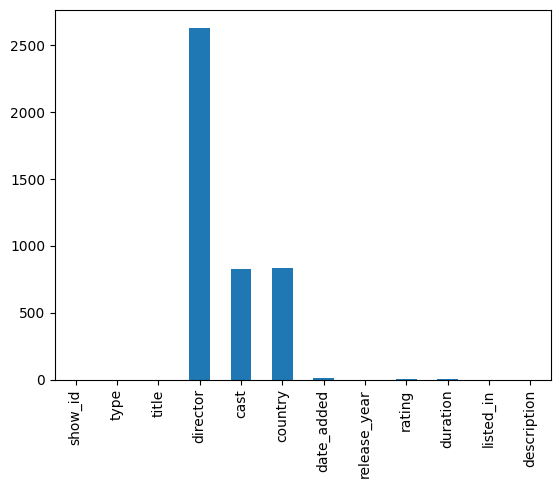

In [7]:
df.isnull().sum().plot(kind='bar')

In [8]:
#checking the duplicate values in the data
duplicate_values=df.duplicated().sum()
print(f'The data contains {duplicate_values} duplicate values')

The data contains 0 duplicate values


# **Cleaning The Data**

In [9]:
df['rating'].unique() #returns all the unique values for the 'ratings' column

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

The rating of a movie can not be in minutes. so we drop the rows that have incorrect ratings.

In [10]:
df.drop(df[df['rating'].isin(['74 min', '84 min', '66 min'])].index, inplace=True)

In [11]:
df[df['rating'].isna()] #returns rows where the 'rating' column is NA

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [12]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'NR', nan, 'TV-Y7-FV', 'UR'], dtype=object)

Now we can see that all the rows have the correct value for rating.

In [13]:
df = df.drop(['director', 'cast'], axis=1) #since the director and cast columns are not important, we drop them
df.columns

Index(['show_id', 'type', 'title', 'country', 'date_added', 'release_year',
       'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [14]:
df[df['date_added'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [15]:
df = df[df['date_added'].notna()] #removes the rows with missing values in the 'date_added' column

In [16]:
df['country'] = df['country'].fillna(df['country'].mode()[0]) #imputes the missing values in the 'country' column with the most frequent value present in that column

In [17]:
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          4
duration        0
listed_in       0
description     0
dtype: int64

Most of our null values have been removed now.

In [18]:
df['year_added'] = df['date_added'].apply(lambda x: x.split(" ")[-1]) #stores the year from the date_added column in new dataframe
df['year_added'].head()

0    2021
1    2021
2    2021
3    2021
4    2021
Name: year_added, dtype: object

In [19]:
df['month_added'] = df['date_added'].apply(lambda x: x.split(" ")[0]) #stores the month from thedate_added column in new dataframe
df['month_added'].head()

0    September
1    September
2    September
3    September
4    September
Name: month_added, dtype: object

In [20]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

In [21]:
df['target_ages'] = df['rating'].replace(ratings_ages) #replaces the rating with the target ages in the column 'target_ages'
df['target_ages'].unique()

array(['Teens', 'Adults', 'Older Kids', 'Kids', nan], dtype=object)

In [22]:
df['principal_country'] = df['country'].apply(lambda x: x.split(",")[0]) #stores primary country for every row in the 'principal_country' column
df['principal_country'].head()

0    United States
1     South Africa
2    United States
3    United States
4            India
Name: principal_country, dtype: object

In [23]:
df.dtypes

show_id              object
type                 object
title                object
country              object
date_added           object
release_year          int64
rating               object
duration             object
listed_in            object
description          object
year_added           object
month_added          object
target_ages          object
principal_country    object
dtype: object

In [24]:
# type should be a category
df['type'] = pd.Categorical(df['type'])

# target_ages is another category (4 classes)
df['target_ages'] = pd.Categorical(df['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

# Year added should be integer so we can compare with `released_year`
df['year_added'] = pd.to_numeric(df['year_added'])

In [25]:
df.dtypes

show_id                object
type                 category
title                  object
country                object
date_added             object
release_year            int64
rating                 object
duration               object
listed_in              object
description            object
year_added              int64
month_added            object
target_ages          category
principal_country      object
dtype: object

In [26]:
df['genre'] = df['listed_in'].apply(lambda x :  x.replace(' ,',',').replace(', ',',').split(',')) #to find the genres
df['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

# **Visualising The Data**

In [27]:
#store movies and tv shows in different dataframes
movie_df = df[df['type'] == 'Movie']
show_df = df[df['type'] == 'TV Show']

movie_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,target_ages,principal_country,genre
0,s1,Movie,Dick Johnson Is Dead,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,Teens,United States,[Documentaries]
6,s7,Movie,My Little Pony: A New Generation,United States,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,2021,September,Older Kids,United States,[Children & Family Movies]
7,s8,Movie,Sankofa,"United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021,September,Adults,United States,"[Dramas, Independent Movies, International Mov..."
9,s10,Movie,The Starling,United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,2021,September,Teens,United States,"[Comedies, Dramas]"
12,s13,Movie,Je Suis Karl,"Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,2021,September,Adults,Germany,"[Dramas, International Movies]"


In [28]:
#remove 'min' suffix from duration in movie_df
movie_df['duration'] = movie_df['duration'].str.replace(' min', '').astype(int)

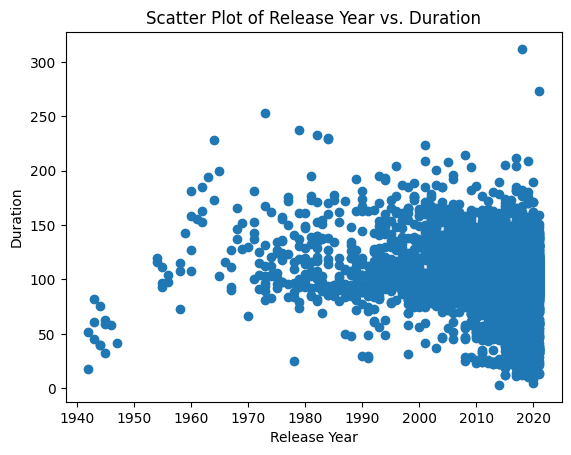

In [29]:
plt.scatter(movie_df['release_year'], movie_df['duration'])
plt.xlabel('Release Year')
plt.ylabel('Duration')
plt.title('Scatter Plot of Release Year vs. Duration')

# Display the plot
plt.show()

In [30]:
#plotting a pie chart
fig = px.pie(df['type'].value_counts().reset_index(), values='type', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

As it is clear from the pie chart, our dataset contains much more movies than TV shows.

In [31]:
def generate_rating_df(df):
    rating_df = df.groupby(['rating', 'target_ages']).agg({'show_id': 'count'}).reset_index()
    rating_df = rating_df[rating_df['show_id'] != 0]
    rating_df.columns = ['rating', 'target_ages', 'counts']
    rating_df = rating_df.sort_values('target_ages')
    return rating_df

In [32]:
#bar graph to show the rating variations
rating_df = generate_rating_df(df)
fig = px.bar(rating_df, x='rating', y='counts', color='target_ages')
fig.show()

As seen from the bar graph, the dataset contains higher count of TV-MA or Adults movies. G or Kids movies occur the least number of times.

In [33]:
movie_rating_df = generate_rating_df(movie_df)
show_rating_df = generate_rating_df(show_df)

fig = make_subplots(rows=1, cols=2, specs=[[{"type": "pie"}, {"type": "pie"}]])

fig.add_trace(
    go.Pie(labels=movie_rating_df['target_ages'], values=movie_rating_df['counts']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=show_rating_df['target_ages'], values=show_rating_df['counts']),
    row=1, col=2
)

fig.update_traces(textposition='inside', hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Rating distribution by Type of content",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Movies', x=0.207, y=0.5, font_size=12, showarrow=False),
                 dict(text='TV Shows', x=0.8, y=0.5, font_size=12, showarrow=False)])
fig.show()

The above pie charts show what portions of the movies and tv shows are of adult rating, teens rating, etc. ~47% of the movies and ~43% of the tv shows are adult while only ~5% of movies and ~10% of tv shows are for kids.

In [34]:
min_duration = movie_df['duration'].min()
max_duration = movie_df['duration'].max()
avg_duration = movie_df['duration'].mean()
print(f'The minumun duration of a movie is {min_duration} minutes and maximum duration is {max_duration} minutes.')
print(f'The average duration of a movie is {int(avg_duration)} minutes.')

The minumun duration of a movie is 3 minutes and maximum duration is 312 minutes.
The average duration of a movie is 99 minutes.


In [35]:
country_df = df['principal_country'].value_counts().reset_index()
country_df = country_df[country_df['principal_country'] /  country_df['principal_country'].sum() > 0.01]

fig = px.pie(country_df, values='principal_country', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

The above pie chart shows the dominant principal country is United States, with about 53% of the movies and tv shows being centered around it. India comes second and Nigeria comes last.

In [36]:
fig = px.histogram(df, x='principal_country')
fig.update_xaxes(categoryorder='total descending')
fig.show()

The same data is shown using a histogram.

In [37]:
released_year_df = df.loc[df['release_year'] > 2010].groupby(['release_year', 'type']).agg({'show_id': 'count'}).reset_index()
added_year_df = df.loc[df['year_added'] > 2010].groupby(['year_added', 'type']).agg({'show_id': 'count'}).reset_index()

fig = go.Figure()
fig.add_trace(go.Scatter(
    x=released_year_df.loc[released_year_df['type'] == 'Movie']['release_year'],
    y=released_year_df.loc[released_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Released Year',
    marker_color='green',
))
fig.add_trace(go.Scatter(
    x=released_year_df.loc[released_year_df['type'] == 'TV Show']['release_year'],
    y=released_year_df.loc[released_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Released Year',
    marker_color='red',
))
fig.add_trace(go.Scatter(
    x=added_year_df.loc[added_year_df['type'] == 'Movie']['year_added'],
    y=added_year_df.loc[added_year_df['type'] == 'Movie']['show_id'],
    mode='lines+markers',
    name='Movie: Year Added',
    marker_color='blue',
))
fig.add_trace(go.Scatter(
    x=added_year_df.loc[added_year_df['type'] == 'TV Show']['year_added'],
    y=added_year_df.loc[added_year_df['type'] == 'TV Show']['show_id'],
    mode='lines+markers',
    name='TV Show: Year Added',
    marker_color='orange',
))
fig.update_xaxes(title_text='Year')
fig.update_yaxes(title_text='Number of Shows')
fig.update_xaxes(categoryorder='total descending')
fig.show()

The above plot clearly shows a drastic increase in the number of movies and tv shows added to Netflix after 2016, with a slight dip in tv shows added in 2018. It also shows a slight increase in the number of tv shows added to Netflix after 2016.

From the above graph, we can also note the dip in movies and tv shows released and added after 2020.

In [38]:
from sklearn.preprocessing import MultiLabelBinarizer

In [39]:
def calculate_mlb(series):
    mlb = MultiLabelBinarizer()
    mlb_df = pd.DataFrame(mlb.fit_transform(series), columns=mlb.classes_, index=series.index)
    return mlb_df

In [40]:
def top_genres(df, title='Top ones'):
    genres_df = calculate_mlb(df['genre'])
    tdata = genres_df.sum().sort_values(ascending=False)

    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=tdata.index,
        y=tdata.values,
    ))
    fig.update_xaxes(categoryorder='total descending')
    fig.update_xaxes(title_text='Genre')
    fig.update_yaxes(title_text='Frequency')
    fig.update_layout(title=title)
    fig.show()

In [41]:
top_genres(movie_df, title='Top Movies Genres')

The above plot shows the frequency of movies of different genres.
The International Movies genre seems to be most frequent in our dataset, followed by Drama.

In [42]:
top_movies_genres = [
    'International Movies',
    'Dramas',
    'Comedies',
    'Documentaries',
    'Action & Adventure',
]

In [43]:
top_genres(show_df, title='Top TV Shows Genres')

The above plot shows the frequency of tv shows of different genres.
The International TV Shows genre seems to be most frequent in our dataset, followed by TV Drama.

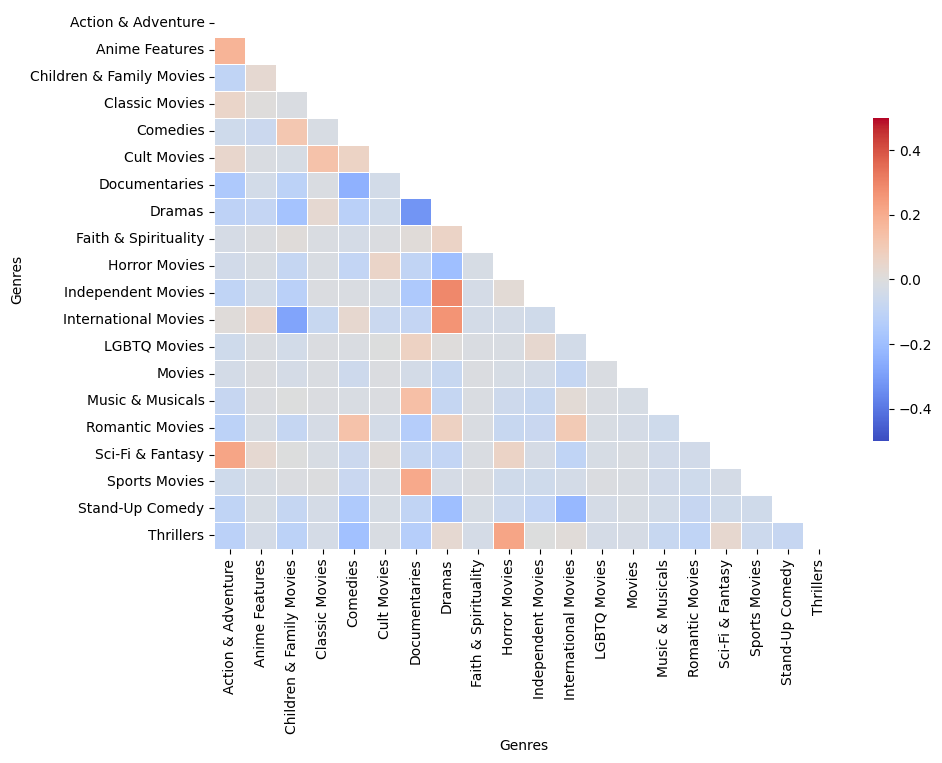

In [44]:
genres_df = calculate_mlb(movie_df['genre'])

movie_corr = genres_df.corr()
movie_mask = np.zeros_like(movie_corr, dtype=bool)
movie_mask[np.triu_indices_from(movie_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(movie_corr, mask=movie_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
ax.set_xlabel('Genres')
ax.set_ylabel('Genres')
plt.show()

The above heatmap is used to visualize the correlation between different genres in a movie dataset. The 'Independent Movie' and the 'Drama' genres have high correlation. It indicates that these two genres tend to occur together frequently in the dataset. In other words, movies that are categorized as 'Independent Movie' are often also categorized as 'Drama', and vice versa.

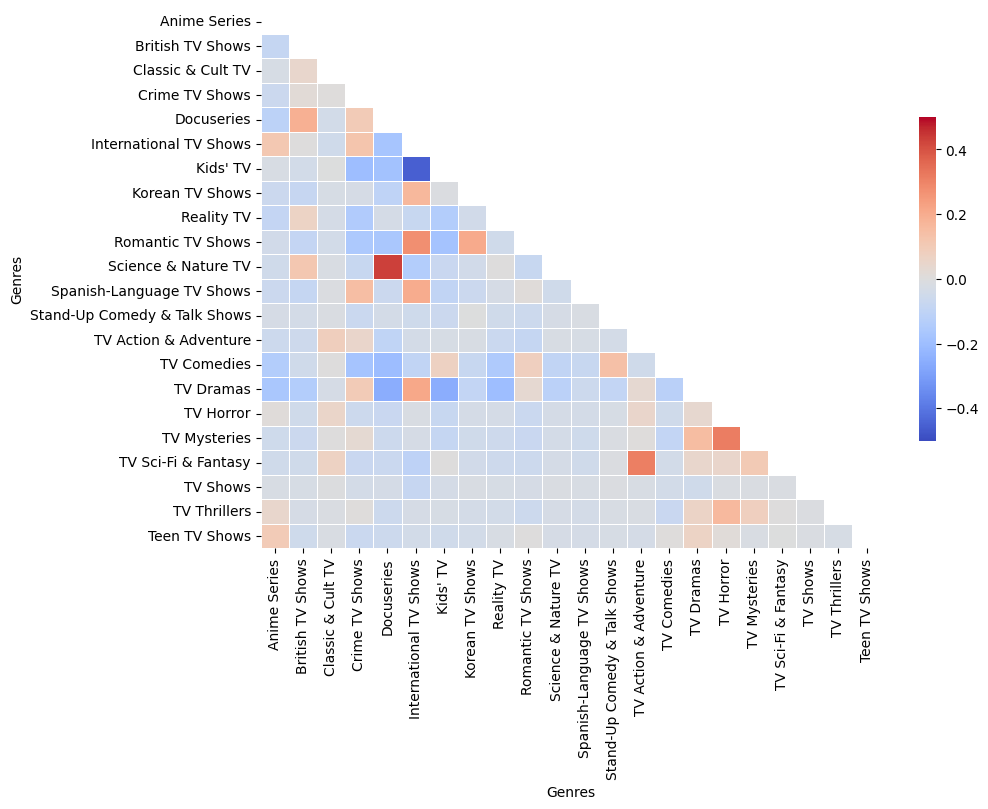

In [45]:
genres_df = calculate_mlb(show_df['genre'])

show_corr = genres_df.corr()
show_mask = np.zeros_like(show_corr, dtype=bool)
show_mask[np.triu_indices_from(show_mask)] = True
fig, ax = plt.subplots(figsize=(10, 7))
pl = sns.heatmap(show_corr, mask=show_mask, cmap= "coolwarm", vmax=.5, vmin=-.5, center=0, linewidths=.5,
                 cbar_kws={"shrink": 0.6})
ax.set_xlabel('Genres')
ax.set_ylabel('Genres')
plt.show()

The above heatmap is used to visualize the correlation between different genres in a tv show dataset. The 'Science and Nature TV' and the 'Docuseries' genres have high correlation. It indicates that these two genres tend to occur together frequently in the dataset. In other words, movies that are categorized as 'Science and Nature TV' are often also categorized as 'Docuseries', and vice versa.

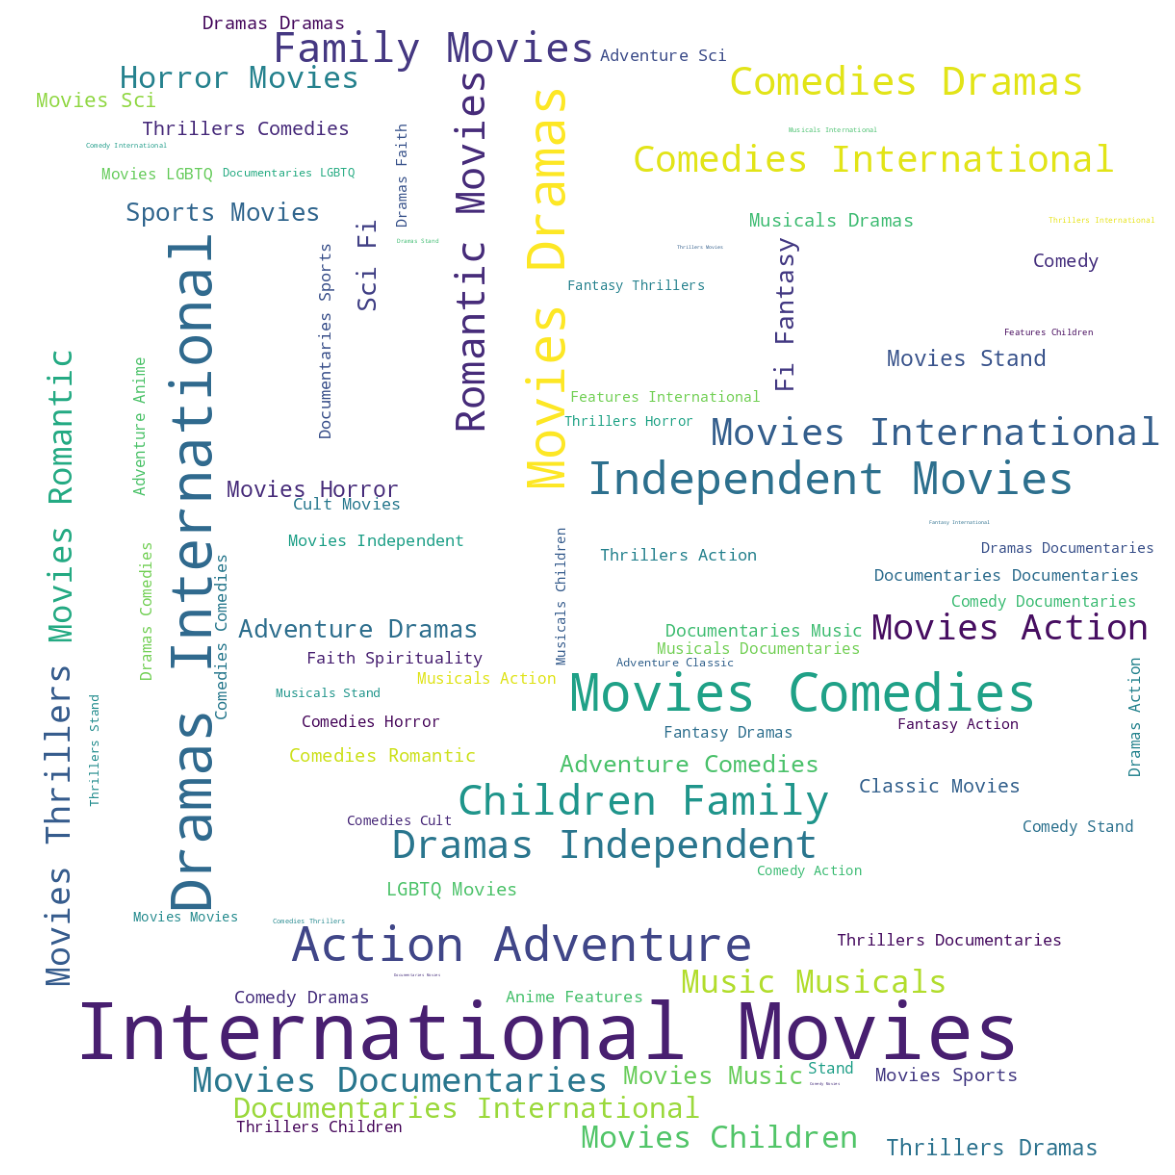

In [46]:
from wordcloud import WordCloud

text = str(list(movie_df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The above wordcloud is a visually appealing way of showing the relative frequency of different genres in the movies dataset. The size of each word corresponds to its frequency in the dataset. Here, the more frequent genres are 'International Movies', 'Dramas', etc.

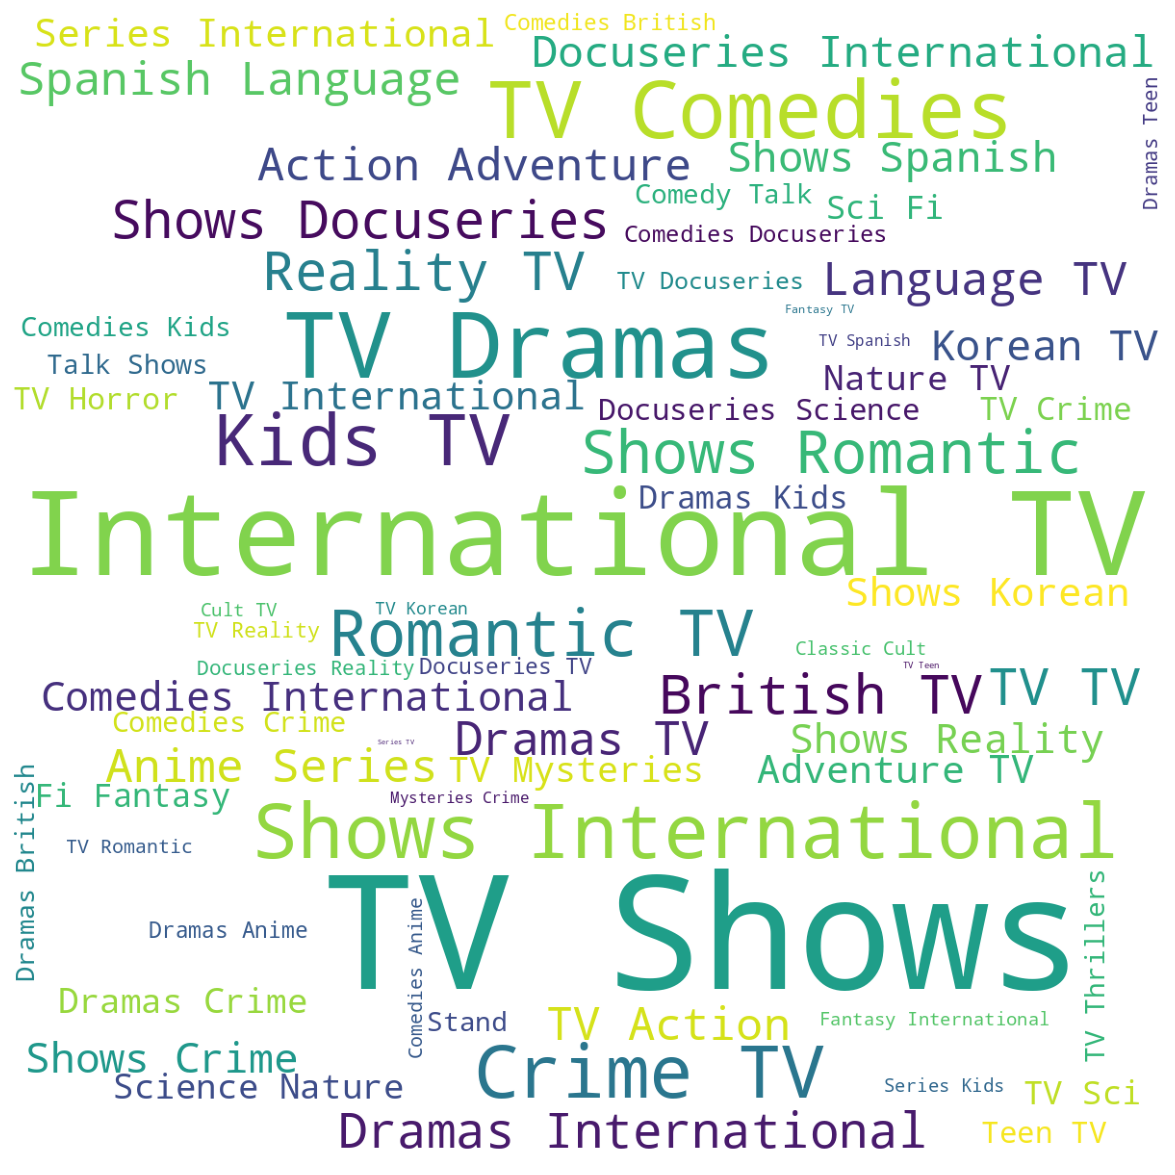

In [47]:
text = str(list(show_df['genre'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '')

plt.rcParams['figure.figsize'] = (15, 15)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

The above wordcloud is a visually appealing way of showing the relative frequency of different genres in the tv shows dataset. The size of each word corresponds to its frequency in the dataset. Here, the more frequent genres are 'TV Dramas', 'TV Comedies', etc.

In [48]:
fig = px.histogram(x=show_df['duration'])
fig.update_xaxes(categoryorder="total descending")
fig.update_layout(
    title="Distribution of shows duration",
    xaxis_title="Duration of the Show",
)
fig.show()

The above histogram shows the common or more frequent number of seasons in tv shows. The highest frequency in our dataset is of shows having only one season.